_____________________________

# Boosting
created by Muhyi :
muhyifathi@gmail.com

___________________________

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import data dari csv
bankloan = pd.read_csv('bankloan.csv')

In [3]:
# manmpilkan beberapa baris data awal
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
print("Dimensi Data : ",bankloan.shape,"\n")
print("Tipe Data :\n ",bankloan.dtypes,"\n")
print("Data Hilang :\n ",bankloan.isnull().sum())

Dimensi Data :  (700, 9) 

Tipe Data :
  age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object 

Data Hilang :
  age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64


_____________________

# EKSPLORASI DATA

______________

# Peubah Respon

In [5]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt
# library seaborn
import seaborn as sns

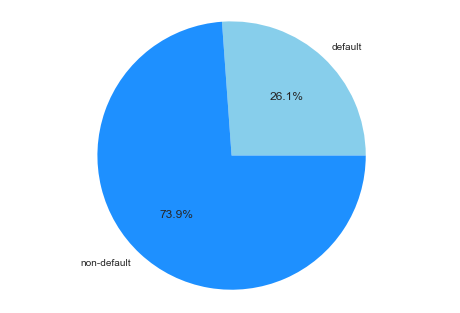

In [6]:
# menghitung ukuran diagram pie
size = [sum(bankloan['default']),
        len(bankloan['default'])-sum(bankloan['default'])]

# menentukan label
label = ['default','non-default']

# memilih warna
color = ["skyblue","dodgerblue"]

# diagram pie 
plt.pie(size,labels=label,colors=color,autopct='%1.1f%%')

# mengatur besarnya huruf
sns.set_context("paper", font_scale=2)

plt.axis('equal')
plt.show()

# Peubah Kategorik

In [7]:
# membuat tabulasi silang untuk peubah kategorik
ed=pd.crosstab(bankloan['ed'],bankloan['default'])
ed

default,0,1
ed,,
1,293,79
2,139,59
3,57,30
4,24,14
5,4,1


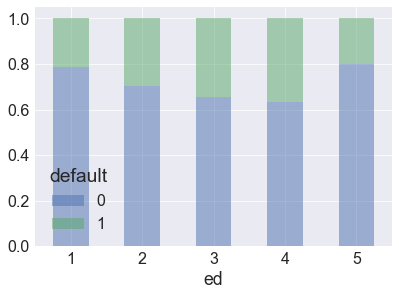

In [8]:
# membuat grafik
pd.crosstab(bankloan['ed'],bankloan['default']
            ,normalize=0).plot(kind='bar',stacked=True,alpha=0.5)

# mengatur orientasi label pada grafik
plt.xticks(rotation='horizontal')

plt.show()

# Peubah Numerik

In [9]:
# memilih peubah numerik
FITUR_NUM=list(bankloan.columns[0:1])+list(bankloan.columns[4:8])
FITUR_NUM

['age', 'income', 'debtinc', 'creddebt', 'othdebt']

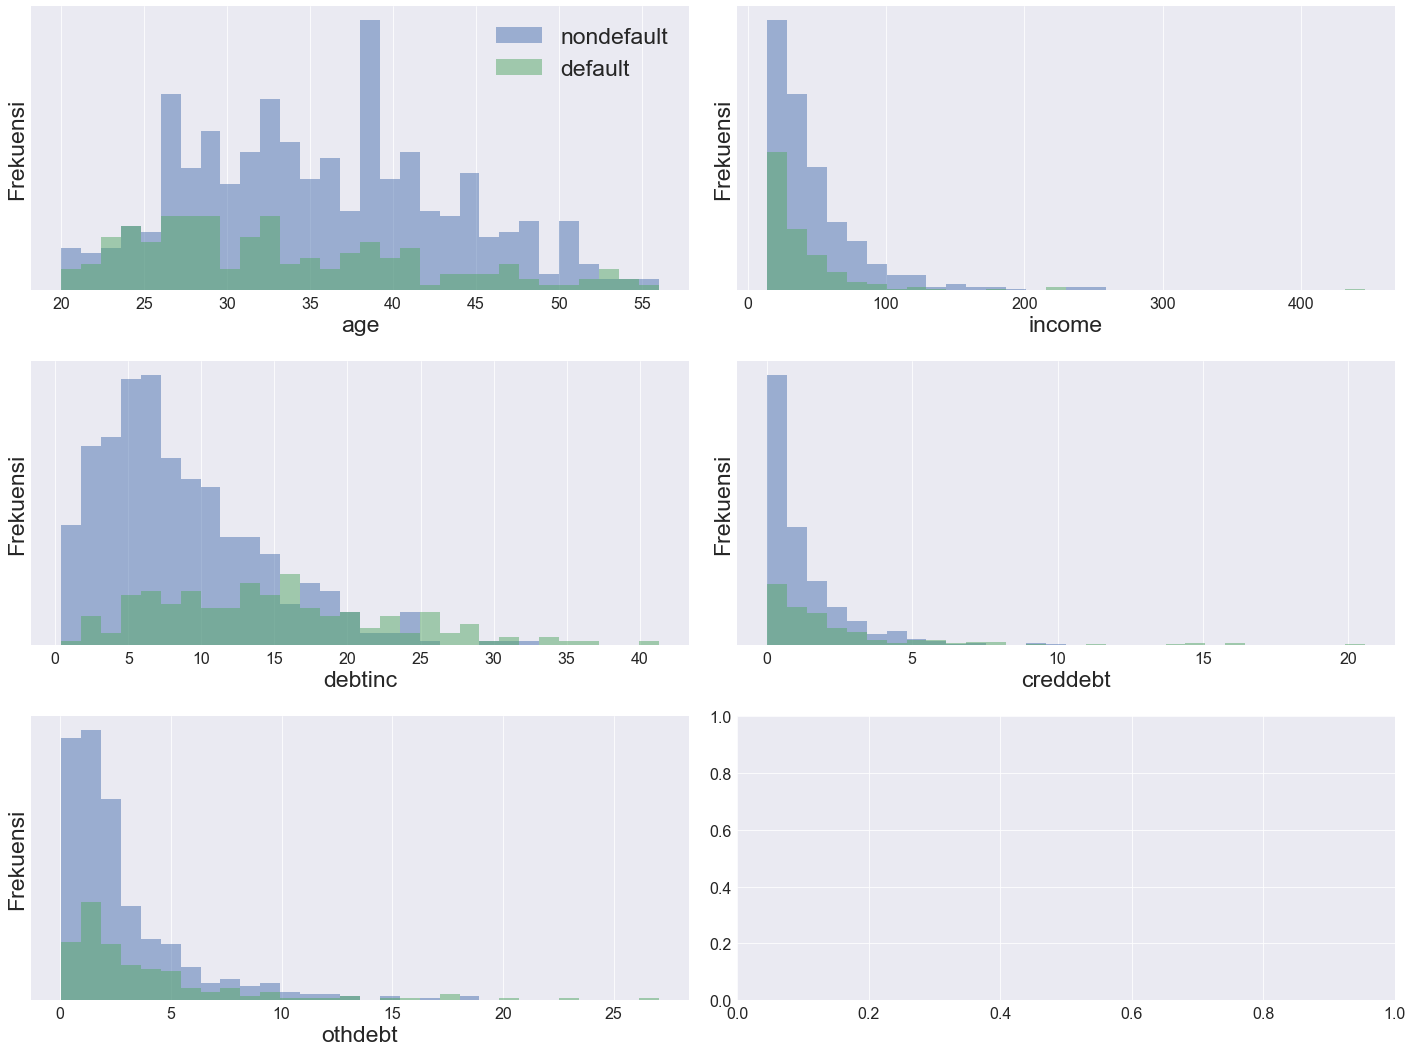

In [10]:
# membuat stacked histogram dengan looping

# menyediakan jenedla dengan ukuran tertentu
fig, axes = plt.subplots(3,2,figsize=(20,15))

# memisahkan data untuk masing masing kategori pada peubah respon
default = bankloan[bankloan['default']==1]
nondefault = bankloan[bankloan['default']==0]

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(FITUR_NUM)):
    
    # banyaknya kelas pada histogram
    _, bins = np.histogram(bankloan[FITUR_NUM[i]],bins=30)
    
    # membuat histogram kategori nondefault
    ax[i].hist(nondefault[FITUR_NUM[i]],bins=bins,alpha=0.5)
    
    # membuat histogram kategori default
    ax[i].hist(default[FITUR_NUM[i]],bins=bins,alpha=0.5)
    
    # menghilangkan skala pada sumbu y
    ax[i].set_yticks(())
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_xlabel(FITUR_NUM[i],fontsize=23)
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_ylabel("Frekuensi",fontsize=23)
    
    ax[i].set_title("")

# manambahkan keterangan
ax[0].legend(['nondefault','default'],loc='best',fontsize=23)

# mengatur jarak pada jendela secara otomatis
fig.tight_layout()

plt.show()

_______________________

# PEMODELAN

______________________

# Membuat Peubah Dummy

In [11]:
print("peubah awal:\n", list(bankloan),"\n")
bankloan_dummies = pd.get_dummies(bankloan,columns=['ed'])
print("peubah setelah dummy dibuat:\n", list(bankloan_dummies),"\n")

peubah awal:
 ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default'] 

peubah setelah dummy dibuat:
 ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'ed_1', 'ed_2', 'ed_3', 'ed_4', 'ed_5'] 



In [12]:
# memilih peubah yang akan digunakan dalam pemodelan 
FITUR_DUMMIES=list(bankloan_dummies.columns[0:7])+list(bankloan_dummies.columns[8:13])
y=bankloan['default']
FITUR_DUMMIES

['age',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'ed_1',
 'ed_2',
 'ed_3',
 'ed_4',
 'ed_5']

# Membagi Data Train Test

In [13]:
# library untuk membagi data
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import StratifiedKFold

In [14]:
x_trainval, x_test, y_trainval, y_test = train_test_split(bankloan_dummies[FITUR_DUMMIES],
                                                          y,random_state=0,stratify=y) 
x_train, x_val, y_train, y_val = train_test_split(x_trainval,
                                                  y_trainval,random_state=0,
                                                  stratify=y_trainval)

# Evaluasi Prediksi

In [15]:
# library untuk evaluasi hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score

# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [16]:
# menegmbangkan fungsi untuk evaluasi

skf = StratifiedKFold(n_splits=5,random_state=10)

def eval_cv(alg,X,y):
    print("akurasi cv : \n",
          cross_val_score(alg,X,y,scoring="accuracy",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="accuracy",cv=skf).mean(),"\n")
    print("recall cv : \n",
          cross_val_score(alg,X,y,scoring="recall",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="recall",cv=skf).mean(),"\n")
    print("presisi cv : \n",
          cross_val_score(alg,X,y,scoring="precision",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="precision",cv=skf).mean(),"\n")
    print("f1 cv : \n",
          cross_val_score(alg,X,y,scoring="f1",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="f1",cv=skf).mean(),"\n")

    
def eval(alg,X,y):
    alg.fit(x_train,y_train)
    print("akurasi:\n",
          accuracy_score(y,alg.predict(X)),"\n")
    print("confusion matirx test:\n",
          confusion_matrix(y,alg.predict(X)),"\n")
    print("classification Report test:\n",
          classification_report(y,alg.predict(X)),"\n")

# 1. Adaptive Boosting

#    Regresi Logistik

In [17]:
# library regresi logistik
from sklearn.linear_model import LogisticRegression
# library adaptive boosting
from sklearn.ensemble import AdaBoostClassifier

In [18]:
# pemodelan regresi logistik
reglog = LogisticRegression()
# pemodelan regreso logistik dengan adaptive boosting
ada_reglog = AdaBoostClassifier(reglog,
                                n_estimators=200,
                                learning_rate=0.1,
                                random_state=10)

In [19]:
# evaluasi nilai prediksi reglog validasi silang
eval_cv(reglog,x_trainval,y_trainval)

akurasi cv : 
 [ 0.81132075  0.78301887  0.80952381  0.85576923  0.81730769] 
 0.815388071048 

recall cv : 
 [ 0.46428571  0.46428571  0.59259259  0.51851852  0.51851852] 
 0.51164021164 

presisi cv : 
 [ 0.72222222  0.61904762  0.64        0.875       0.7       ] 
 0.711253968254 

f1 cv : 
 [ 0.56521739  0.53061224  0.61538462  0.65116279  0.59574468] 
 0.591624344627 



In [20]:
# evaluasi nilai prediksi adaboost reglog validasi silang
eval_cv(ada_reglog,x_trainval,y_trainval)

akurasi cv : 
 [ 0.81132075  0.79245283  0.8         0.84615385  0.82692308] 
 0.815370101597 

recall cv : 
 [ 0.42857143  0.5         0.55555556  0.51851852  0.51851852] 
 0.504232804233 

presisi cv : 
 [ 0.75        0.63636364  0.625       0.82352941  0.73684211] 
 0.714347030678 

f1 cv : 
 [ 0.54545455  0.56        0.58823529  0.63636364  0.60869565] 
 0.587749825622 



In [21]:
# evaluasi reglog pada data train
eval(reglog,x_train,y_train)

akurasi:
 0.824427480916 

confusion matirx test:
 [[264  26]
 [ 43  60]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.86      0.91      0.88       290
          1       0.70      0.58      0.63       103

avg / total       0.82      0.82      0.82       393
 



In [22]:
# evaluasi adaboost reglog pada data train
eval(ada_reglog,x_train,y_train)

akurasi:
 0.81679389313 

confusion matirx test:
 [[264  26]
 [ 46  57]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.85      0.91      0.88       290
          1       0.69      0.55      0.61       103

avg / total       0.81      0.82      0.81       393
 



In [23]:
# evaluasi reglog pada data test
eval(reglog,x_test,y_test)

akurasi:
 0.765714285714 

confusion matirx test:
 [[115  14]
 [ 27  19]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.89      0.85       129
          1       0.58      0.41      0.48        46

avg / total       0.75      0.77      0.75       175
 



In [24]:
# evaluasi pada adaboost reglog data test
eval(ada_reglog,x_test,y_test)

akurasi:
 0.782857142857 

confusion matirx test:
 [[117  12]
 [ 26  20]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       129
          1       0.62      0.43      0.51        46

avg / total       0.77      0.78      0.77       175
 



# Decision Tree

In [25]:
# library decision tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
# pemodelan regresi logistik
tree = DecisionTreeClassifier(random_state=10)
tree.fit(x_trainval,y_trainval)
# pemodelan regreso logistik dengan adaptive boosting
ada_tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                                n_estimators=200,
                                learning_rate=0.5,
                                random_state=10)
ada_tree.fit(x_trainval,y_trainval)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=10)

In [27]:
# mengembangkan fungsi untuk membuat plot peubah penting
def plot_peubah_penting(model,FITUR):
    n_features = len(list(model.feature_importances_))
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),FITUR,fontsize=14)
    plt.xlabel("Tingkat Kepentingan Peubah",fontsize=23)
    plt.ylabel("Peubah",fontsize=23)
    plt.show()

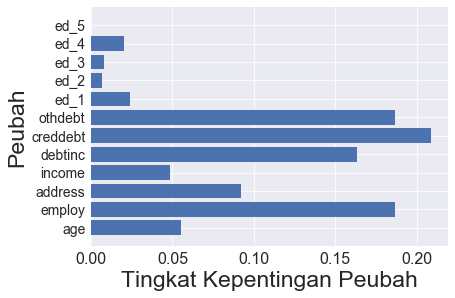

In [28]:
# plot peubah penting
plot_peubah_penting(tree,FITUR_DUMMIES)

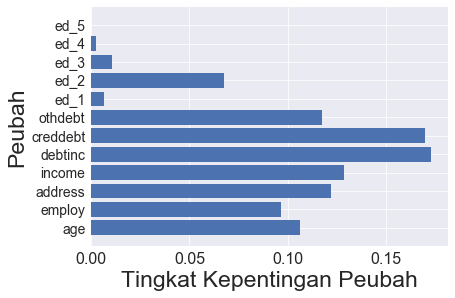

In [29]:
# plot peubah penting
plot_peubah_penting(ada_tree,FITUR_DUMMIES)

In [30]:
# evaluasi nilai prediksi decision tree validasi silang
eval_cv(tree,x_trainval,y_trainval)

akurasi cv : 
 [ 0.71698113  0.72641509  0.60952381  0.75961538  0.77884615] 
 0.71827631488 

recall cv : 
 [ 0.53571429  0.5         0.40740741  0.48148148  0.48148148] 
 0.481216931217 

presisi cv : 
 [ 0.46875     0.48275862  0.30555556  0.54166667  0.59090909] 
 0.477927986764 

f1 cv : 
 [ 0.5         0.49122807  0.34920635  0.50980392  0.53061224] 
 0.47617011717 



In [31]:
# evaluasi nilai prediksi adaboost decision tree validasi silang
eval_cv(ada_tree,x_trainval,y_trainval)

akurasi cv : 
 [ 0.78301887  0.77358491  0.76190476  0.73076923  0.76923077] 
 0.763701707098 

recall cv : 
 [ 0.5         0.39285714  0.55555556  0.33333333  0.51851852] 
 0.460052910053 

presisi cv : 
 [ 0.60869565  0.61111111  0.53571429  0.47368421  0.56      ] 
 0.557841051905 

f1 cv : 
 [ 0.54901961  0.47826087  0.54545455  0.39130435  0.53846154] 
 0.50050018183 



In [32]:
# evaluasi tree pada data train
eval(tree,x_train,y_train)

akurasi:
 1.0 

confusion matirx test:
 [[290   0]
 [  0 103]] 

classification Report test:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       290
          1       1.00      1.00      1.00       103

avg / total       1.00      1.00      1.00       393
 



In [33]:
# evaluasi adaboost tree pada data train
eval(ada_tree,x_train,y_train)

akurasi:
 1.0 

confusion matirx test:
 [[290   0]
 [  0 103]] 

classification Report test:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       290
          1       1.00      1.00      1.00       103

avg / total       1.00      1.00      1.00       393
 



In [34]:
# evaluasi tree pada data test
eval(tree,x_test,y_test)

akurasi:
 0.754285714286 

confusion matirx test:
 [[108  21]
 [ 22  24]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.83      0.84      0.83       129
          1       0.53      0.52      0.53        46

avg / total       0.75      0.75      0.75       175
 



In [35]:
# evaluasi adaboost tree pada data test
eval(ada_tree,x_test,y_test)

akurasi:
 0.725714285714 

confusion matirx test:
 [[110  19]
 [ 29  17]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.79      0.85      0.82       129
          1       0.47      0.37      0.41        46

avg / total       0.71      0.73      0.71       175
 



# 2. Gradient Boosting

In [36]:
# library gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# model gradient boosting
gbc = GradientBoostingClassifier()

In [38]:
#evaluasi nilai prediksi gradient boosting validasi silang
eval_cv(gbc,x_trainval,y_trainval)

akurasi cv : 
 [ 0.72641509  0.80188679  0.78095238  0.78846154  0.79807692] 
 0.781045338309 

recall cv : 
 [ 0.35714286  0.5         0.55555556  0.37037037  0.44444444] 
 0.445238095238 

presisi cv : 
 [ 0.47826087  0.66666667  0.64        0.66666667  0.66666667] 
 0.611463046757 

f1 cv : 
 [ 0.40816327  0.57142857  0.61538462  0.47619048  0.53333333] 
 0.515672533164 



In [39]:
#evaluasi nilai prediksi gradient boosting train
eval(gbc,x_train,y_train)

akurasi:
 0.979643765903 

confusion matirx test:
 [[289   1]
 [  7  96]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       290
          1       0.99      0.93      0.96       103

avg / total       0.98      0.98      0.98       393
 



In [40]:
#evaluasi nilai prediksi gradient boosting test
eval(gbc,x_test,y_test)

akurasi:
 0.765714285714 

confusion matirx test:
 [[116  13]
 [ 28  18]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.90      0.85       129
          1       0.58      0.39      0.47        46

avg / total       0.75      0.77      0.75       175
 



# 3. Extreme Gradient Boosting

In [41]:
# library extreme gradient boosting
from xgboost.sklearn import XGBClassifier

In [42]:
# model xgboost
exgb = XGBClassifier(min_child_weight=1,
                    max_depth=5,
                    gamma=0.12,
                    subsample=0.8,
                    learning_rate=0.1,
                    n_estimators=1000)

In [43]:
# evaluasi nilai prediksi gradient boosting validasi silang
eval_cv(exgb,x_trainval,y_trainval)

akurasi cv : 
 [ 0.77358491  0.80188679  0.73333333  0.81730769  0.82692308] 
 0.790607160135 

recall cv : 
 [ 0.53571429  0.57142857  0.51851852  0.48148148  0.51851852] 
 0.525132275132 

presisi cv : 
 [ 0.57692308  0.64        0.48275862  0.72222222  0.73684211] 
 0.63174920502 

f1 cv : 
 [ 0.55555556  0.60377358  0.5         0.57777778  0.60869565] 
 0.569160514083 



In [44]:
# evaluasi nilai prediksi gradient boosting test
eval(exgb,x_train,y_train)

akurasi:
 1.0 

confusion matirx test:
 [[290   0]
 [  0 103]] 

classification Report test:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       290
          1       1.00      1.00      1.00       103

avg / total       1.00      1.00      1.00       393
 



In [45]:
# evaluasi nilai prediksi gradient boosting test
eval(exgb,x_test,y_test)

akurasi:
 0.742857142857 

confusion matirx test:
 [[109  20]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.84      0.83       129
          1       0.51      0.46      0.48        46

avg / total       0.73      0.74      0.74       175
 



# GridSearchCV untuk Memilih Metode Boosting (tanpa tunning parameter)

In [46]:
# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline

In [47]:
# menyiapkan beberapa metode bosting

pipe_boost = Pipeline([('clf',AdaBoostClassifier())])

grid = [
    {'clf':[AdaBoostClassifier()],
        'clf__base_estimator':[reglog,tree]},
    {'clf':[gbc,exgb]}
]

# fungsi gridsearch CV
gsearch_boost = GridSearchCV(pipe_boost,
                            # model grid
                            param_grid = grid,
                            # beberapa ukuran yang ingin dimunculkan
                            scoring = ['accuracy','recall','precision', 'f1'],
                            # ukuran prediksi yang digunakan untuk tunning
                            refit = 'f1',
                            # metode validasi silang
                            cv=skf)

In [48]:
# proses pemodelan
gsearch_boost.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'clf': [AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', ...     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)]}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [49]:
# selurh rekapan hasil pemodelan
hasil_boosting=pd.DataFrame(gsearch_boost.cv_results_)

In [50]:
# daftar informasi yang tersedia dari hasil pemodelan 
list(hasil_boosting)

['mean_fit_time',
 'mean_score_time',
 'mean_test_accuracy',
 'mean_test_f1',
 'mean_test_precision',
 'mean_test_recall',
 'mean_train_accuracy',
 'mean_train_f1',
 'mean_train_precision',
 'mean_train_recall',
 'param_clf',
 'param_clf__base_estimator',
 'params',
 'rank_test_accuracy',
 'rank_test_f1',
 'rank_test_precision',
 'rank_test_recall',
 'split0_test_accuracy',
 'split0_test_f1',
 'split0_test_precision',
 'split0_test_recall',
 'split0_train_accuracy',
 'split0_train_f1',
 'split0_train_precision',
 'split0_train_recall',
 'split1_test_accuracy',
 'split1_test_f1',
 'split1_test_precision',
 'split1_test_recall',
 'split1_train_accuracy',
 'split1_train_f1',
 'split1_train_precision',
 'split1_train_recall',
 'split2_test_accuracy',
 'split2_test_f1',
 'split2_test_precision',
 'split2_test_recall',
 'split2_train_accuracy',
 'split2_train_f1',
 'split2_train_precision',
 'split2_train_recall',
 'split3_test_accuracy',
 'split3_test_f1',
 'split3_test_precision',
 'split3

In [51]:
# menampilkan rekapan hasil

# memilih kolom
lihat = ['params',
         'mean_test_accuracy',
         'mean_test_f1',
         'mean_test_precision',
         'mean_test_recall'
]

# mendefinsikan nama parameter
hasil_boosting['params']=['Adaptive Boosting Reglog',
                          'Adaptive Boosting Tree',
                          'Gradient Boosting',
                          'Extreme Gradient Boosing']

# menampilkan rekapan hasil
hasil_boosting[lihat]

,params,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,Adaptive Boosting Reglog,0.817143,0.589721,0.724316,0.504097
1,Adaptive Boosting Tree,0.727619,0.498492,0.492202,0.510451
2,Gradient Boosting,0.782857,0.523718,0.618543,0.460131
3,Extreme Gradient Boosing,0.790476,0.569109,0.631288,0.525336


In [52]:
# library seaborn
import seaborn as sns

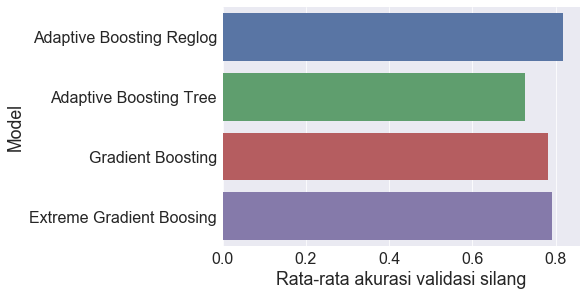

In [53]:
    # barplot hasil
    ax=sns.barplot(y='params',
               x='mean_test_accuracy',
               data=hasil_boosting,
               orient='h')

    # mengatur label pada sumbu y
    plt.ylabel('Model')

    # mengatur label pada sumbu x
    plt.xlabel('Rata-rata akurasi validasi silang')

    plt.show()

In [54]:
# metode terbaik
gsearch_boost.best_estimator_

Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [55]:
# skor f1 tertinggi
gsearch_boost.best_score_

0.58972073439050188

# GridSearchCV untuk Memilih Metode Boosting (dengan tunning parameter)

# AdaBoost Tunning

In [56]:
# model yang disiapkan
ADA = AdaBoostClassifier(random_state=10)

# parameter yang disiapkan
param_ada = {
    'base_estimator':[LogisticRegression(),DecisionTreeClassifier()],
    'n_estimators':[20,40,60,100,120,300],
    'learning_rate':[0.01,0.05,0.1]}

ada_grid = GridSearchCV(ADA,
                       param_grid=param_ada,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

In [57]:
ada_grid.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=10),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), Dec... splitter='best')], 'n_estimators': [20, 40, 60, 100, 120, 300], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [58]:
ada_grid.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'learning_rate': 0.05,
 'n_estimators': 100}

In [59]:
ada_grid.best_score_

0.60268604944130966

# Gradient Boosting Tunning

# Tunning 1 : learning rate dan n estimators

In [60]:
# model yang disiapkan
gb_tune = GradientBoostingClassifier(max_depth=4,
                                    max_features=3,
                                    min_samples_split=20,
                                    min_samples_leaf=20,
                                    learning_rate=0.2,
                                    subsample = 0.8,
                                    random_state=10)

# parameter yang disiapkan
param_gb = {
    'n_estimators':[20,40,60,100,120,140]
}

gb_grid = GridSearchCV(gb_tune,
                       param_grid=param_gb,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

gb_grid.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 40, 60, 100, 120, 140]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [61]:
def hasil_tunning(tune):
    print("Parameter Terbaik : \n",tune.best_params_,"\n")
    print("Skor f1 tertinggi : \n",tune.best_score_,"\n")
    print("model terbaik : \n",tune.best_estimator_,"\n")

In [62]:
hasil_tunning(gb_grid)
eval(gb_grid,x_test,y_test)

Parameter Terbaik : 
 {'n_estimators': 40} 

Skor f1 tertinggi : 
 0.601568275602 

model terbaik : 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False) 

akurasi:
 0.76 

confusion matirx test:
 [[117  12]
 [ 30  16]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.80      0.91      0.85       129
          1       0.57      0.35      0.43        46

avg / total       0.74      0.76      0.74       175
 



# Tunning 2 : Tree Specific (max_depth,min_samples_split)

In [63]:
# model yang disiapkan
gb_tune2 = GradientBoostingClassifier(#max_depth=4,
                                    max_features=3,
                                    n_estimators=40,
                                    #min_samples_split=20,
                                    min_samples_leaf=20,
                                    learning_rate=0.2,
                                    subsample = 0.8,
                                    random_state=10)

# parameter yang disiapkan
param_gb2 = {
    'max_depth':range(3,13),
    'min_samples_split':[2,20,50,75,100]
}

gb_grid2 = GridSearchCV(gb_tune2,
                       param_grid=param_gb2,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

gb_grid2.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(3, 13), 'min_samples_split': [2, 20, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [64]:
hasil_tunning(gb_grid2)
eval(gb_grid2,x_test,y_test)

Parameter Terbaik : 
 {'max_depth': 10, 'min_samples_split': 50} 

Skor f1 tertinggi : 
 0.630225743786 

model terbaik : 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False) 

akurasi:
 0.76 

confusion matirx test:
 [[111  18]
 [ 24  22]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.86      0.84       129
          1       0.55      0.48      0.51        46

avg / total       0.75      0.76      0.75       175
 



# Tunning 3 : Tree Specific (min_samples_leaf)

In [65]:
# model yang disiapkan
gb_tune3 = GradientBoostingClassifier(max_depth=10,
                                    max_features=3,
                                    n_estimators=40,
                                    min_samples_split=50,
                                    #min_samples_leaf=20,
                                    learning_rate=0.2,
                                    subsample = 0.8,
                                    random_state=10)

# parameter yang disiapkan
param_gb3 = {
    'min_samples_leaf':[2,20,50,75,100]
}

gb_grid3 = GridSearchCV(gb_tune3,
                       param_grid=param_gb3,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

gb_grid3.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [2, 20, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [66]:
hasil_tunning(gb_grid3)
eval(gb_grid3,x_test,y_test)

Parameter Terbaik : 
 {'min_samples_leaf': 20} 

Skor f1 tertinggi : 
 0.630225743786 

model terbaik : 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False) 

akurasi:
 0.748571428571 

confusion matirx test:
 [[112  17]
 [ 27  19]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.87      0.84       129
          1       0.53      0.41      0.46        46

avg / total       0.73      0.75      0.74       175
 



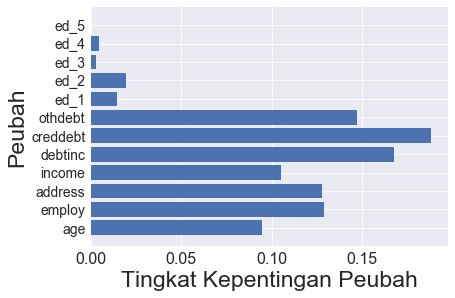

In [67]:
# plot peubah penting
gb_grid3.best_estimator_.fit(x_trainval,y_trainval)
plot_peubah_penting(gb_grid3.best_estimator_,FITUR_DUMMIES)

# Tunning 4 : Tree Specific (max_features)

In [68]:
# model yang disiapkan
gb_tune4 = GradientBoostingClassifier(max_depth=10,
                                    #max_features=3,
                                    n_estimators=40,
                                    min_samples_split=50,
                                    min_samples_leaf=20,
                                    learning_rate=0.2,
                                    subsample = 0.8,
                                    random_state=10)

# parameter yang disiapkan
param_gb4 = {
    'max_features':[3,4,5,6,7,8,9]
}

gb_grid4 = GridSearchCV(gb_tune4,
                       param_grid=param_gb4,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

gb_grid4.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [69]:
hasil_tunning(gb_grid4)
eval(gb_grid4,x_test,y_test)

Parameter Terbaik : 
 {'max_features': 3} 

Skor f1 tertinggi : 
 0.630225743786 

model terbaik : 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False) 

akurasi:
 0.76 

confusion matirx test:
 [[113  16]
 [ 26  20]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.88      0.84       129
          1       0.56      0.43      0.49        46

avg / total       0.75      0.76      0.75       175
 



# Tunning 5 :  lower the learning rate

In [70]:
# model yang disiapkan
gb_tune5 = GradientBoostingClassifier(max_depth=10,
                                    max_features=3,
                                    #n_estimators=40,
                                    min_samples_split=50,
                                    min_samples_leaf=20,
                                    #learning_rate=0.2,
                                    subsample = 0.8,
                                    random_state=10)

# parameter yang disiapkan
param_gb5 = [
    {'learning_rate':[0.2],'n_estimators':[40]},
    {'learning_rate':[0.1],'n_estimators':[80]},
    {'learning_rate':[0.05],'n_estimators':[160]},
    {'learning_rate':[0.01],'n_estimators':[800]},
    {'learning_rate':[0.005],'n_estimators':[1600]}
]

gb_grid5 = GridSearchCV(gb_tune5,
                       param_grid=param_gb5,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

gb_grid5.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.2], 'n_estimators': [40]}, {'learning_rate': [0.1], 'n_estimators': [80]}, {'learning_rate': [0.05], 'n_estimators': [160]}, {'learning_rate': [0.01], 'n_estimators': [800]}, {'learning_rate': [0.005], 'n_estimators': [1600]}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy',

In [71]:
hasil_tunning(gb_grid5)
eval(gb_grid5,x_test,y_test)

Parameter Terbaik : 
 {'learning_rate': 0.2, 'n_estimators': 40} 

Skor f1 tertinggi : 
 0.630225743786 

model terbaik : 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=10,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False) 

akurasi:
 0.76 

confusion matirx test:
 [[114  15]
 [ 27  19]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.88      0.84       129
          1       0.56      0.41      0.47        46

avg / total       0.74      0.76      0.75       175
 



# Extreme Gradient Boosting Tunning

# Tunning 1 : learning rate dan n estimators

In [72]:
# model yang disiapkan
exgb_tune = XGBClassifier(min_child_weight=1,
                    max_depth=5,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    learning_rate=0.8,
                    #n_estimators=1000,
                    random_state=10)

# parameter yang disiapkan
param_gb = {
    'n_estimators':[20,40,60,100,120,140]}

exgb_grid = GridSearchCV(exgb_tune,
                       param_grid=param_gb,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

In [73]:
exgb_grid.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 40, 60, 100, 120, 140]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [74]:
hasil_tunning(exgb_grid)
eval(exgb_grid,x_test,y_test)

Parameter Terbaik : 
 {'n_estimators': 40} 

Skor f1 tertinggi : 
 0.547200421884 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.742857142857 

confusion matirx test:
 [[110  19]
 [ 26  20]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.85      0.83       129
          1       0.51      0.43      0.47        46

avg / total       0.73      0.74      0.74       175
 



# Tunning 2 : max depth dan min child weight

In [75]:
# model yang disiapkan
exgb_tune2 = XGBClassifier(#min_child_weight=1,
                    #max_depth=5,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    learning_rate=0.8,
                    n_estimators=40,
                    random_state=10)

# parameter yang disiapkan
param_gb2 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

exgb_grid2 = GridSearchCV(exgb_tune2,
                       param_grid=param_gb2,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid2.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [76]:
hasil_tunning(exgb_grid2)
eval(exgb_grid2,x_test,y_test)

Parameter Terbaik : 
 {'max_depth': 3, 'min_child_weight': 1} 

Skor f1 tertinggi : 
 0.579931274822 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.76 

confusion matirx test:
 [[112  17]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.87      0.84       129
          1       0.55      0.46      0.50        46

avg / total       0.75      0.76      0.75       175
 



# Tunning 3 : max depth dan min child weight

In [77]:
# model yang disiapkan
exgb_tune3 = XGBClassifier(#min_child_weight=1,
                    #max_depth=5,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    learning_rate=0.8,
                    n_estimators=40,
                    random_state=10)

# parameter yang disiapkan
param_gb3 = {
    'max_depth':[2,3,4,5,6],
    'min_child_weight':[1,2,3]
}

exgb_grid3 = GridSearchCV(exgb_tune3,
                       param_grid=param_gb3,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid3.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'min_child_weight': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [78]:
hasil_tunning(exgb_grid3)
eval(exgb_grid3,x_test,y_test)

Parameter Terbaik : 
 {'max_depth': 3, 'min_child_weight': 1} 

Skor f1 tertinggi : 
 0.579931274822 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.765714285714 

confusion matirx test:
 [[113  16]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.88      0.85       129
          1       0.57      0.46      0.51        46

avg / total       0.75      0.77      0.76       175
 



# Tunning 4 : gamma

In [79]:
# model yang disiapkan
exgb_tune4 = XGBClassifier(min_child_weight=1,
                    max_depth=3,
                    #gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    learning_rate=0.8,
                    n_estimators=40,
                    random_state=10)

# parameter yang disiapkan
param_gb4 = {
    'gamma':[i/10.0 for i in range(0,5)]+[0.12]
}

exgb_grid4 = GridSearchCV(exgb_tune4,
                       param_grid=param_gb4,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid4.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.12]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [80]:
hasil_tunning(exgb_grid4)
eval(exgb_grid4,x_test,y_test)

Parameter Terbaik : 
 {'gamma': 0.12} 

Skor f1 tertinggi : 
 0.579931274822 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.702857142857 

confusion matirx test:
 [[105  24]
 [ 28  18]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.79      0.81      0.80       129
          1       0.43      0.39      0.41        46

avg / total       0.69      0.70      0.70       175
 



# Tunning 5 : Subsample and colsample_bytree

In [81]:
# model yang disiapkan
exgb_tune5 = XGBClassifier(min_child_weight=1,
                    max_depth=3,
                    gamma=0.12,
                    #subsample=0.8,
                    #colsample_bytree=1,
                    learning_rate=0.8,
                    n_estimators=40,
                    random_state=10)

# parameter yang disiapkan
param_gb5 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10 for i in range(6,10)]+[1]
}

exgb_grid5 = GridSearchCV(exgb_tune5,
                       param_grid=param_gb5,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid5.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [82]:
hasil_tunning(exgb_grid5)
eval(exgb_grid5,x_test,y_test)

Parameter Terbaik : 
 {'colsample_bytree': 1, 'subsample': 0.8} 

Skor f1 tertinggi : 
 0.579931274822 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.76 

confusion matirx test:
 [[107  22]
 [ 20  26]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.84      0.83      0.84       129
          1       0.54      0.57      0.55        46

avg / total       0.76      0.76      0.76       175
 



# Tunning 6 : Regularization Parameters

In [83]:
# model yang disiapkan
exgb_tune6 = XGBClassifier(min_child_weight=1,
                    max_depth=3,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    learning_rate=0.8,
                    n_estimators=40,
                    random_state=10)

# parameter yang disiapkan
param_gb6 = {
    'reg_alpha':[0.01,0.1,0,1,10],
    'reg_lambda':[0.01,0.1,0,1,10]
}

exgb_grid6 = GridSearchCV(exgb_tune6,
                       param_grid=param_gb6,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid6.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': [0.01, 0.1, 0, 1, 10], 'reg_lambda': [0.01, 0.1, 0, 1, 10]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [84]:
hasil_tunning(exgb_grid6)
eval(exgb_grid6,x_test,y_test)

Parameter Terbaik : 
 {'reg_alpha': 0.01, 'reg_lambda': 10} 

Skor f1 tertinggi : 
 0.60323461165 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0.01, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.76 

confusion matirx test:
 [[112  17]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.87      0.84       129
          1       0.55      0.46      0.50        46

avg / total       0.75      0.76      0.75       175
 



# Tunning 7 : Learning Rate vs n estimator

In [85]:
# model yang disiapkan
exgb_tune7 = XGBClassifier(min_child_weight=1,
                    max_depth=3,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    #learning_rate=0.8,
                    #n_estimators=40,
                    reg_alpha=0.01,
                    reg_lambda=10,
                    random_state=10)

# parameter yang disiapkan
param_gb7 = [
    {'learning_rate':[0.8],'n_estimators':[40]},
    {'learning_rate':[0.4],'n_estimators':[80]},
    {'learning_rate':[0.2],'n_estimators':[160]},
    {'learning_rate':[0.1],'n_estimators':[320]},
    {'learning_rate':[0.05],'n_estimators':[640]}
]

exgb_grid7 = GridSearchCV(exgb_tune7,
                       param_grid=param_gb7,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid7.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0.01, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.8], 'n_estimators': [40]}, {'learning_rate': [0.4], 'n_estimators': [80]}, {'learning_rate': [0.2], 'n_estimators': [160]}, {'learning_rate': [0.1], 'n_estimators': [320]}, {'learning_rate': [0.05], 'n_estimators': [640]}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [86]:
hasil_tunning(exgb_grid7)
eval(exgb_grid7,x_test,y_test)

Parameter Terbaik : 
 {'learning_rate': 0.2, 'n_estimators': 160} 

Skor f1 tertinggi : 
 0.610590797035 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0.01, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8) 

akurasi:
 0.76 

confusion matirx test:
 [[112  17]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.82      0.87      0.84       129
          1       0.55      0.46      0.50        46

avg / total       0.75      0.76      0.75       175
 



# Tunning 7b : Learning Rate vs n estimator

In [87]:
# model yang disiapkan
exgb_tune7 = XGBClassifier(min_child_weight=1,
                    max_depth=3,
                    gamma=0.12,
                    subsample=0.8,
                    colsample_bytree=1,
                    #learning_rate=0.8,
                    #n_estimators=40,
                    #reg_alpha=0.01,
                    #reg_lambda=10,
                    random_state=10)

# parameter yang disiapkan
param_gb7 = [
    {'learning_rate':[0.8],'n_estimators':[40]},
    {'learning_rate':[0.4],'n_estimators':[80]},
    {'learning_rate':[0.2],'n_estimators':[160]},
    {'learning_rate':[0.1],'n_estimators':[320]},
    {'learning_rate':[0.05],'n_estimators':[640]},
    {'learning_rate':[0.025],'n_estimators':[1280]}
]

exgb_grid7 = GridSearchCV(exgb_tune7,
                       param_grid=param_gb7,
                       # beberapa ukuran yang ingin dimunculkan
                       scoring = ['accuracy','recall','precision', 'f1'],
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'f1',
                       # metode validasi silang
                       cv=skf)

exgb_grid7.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.8], 'n_estimators': [40]}, {'learning_rate': [0.4], 'n_estimators': [80]}, {'learning_rate': [0.2], 'n_estimators': [160]}, {'learning_rate': [0.1], 'n_estimators': [320]}, {'learning_rate': [0.05], 'n_estimators': [640]}, {'learning_rate': [0.025], 'n_estimators': [1280]}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1

In [88]:
hasil_tunning(exgb_grid7)
eval(exgb_grid7,x_test,y_test)

Parameter Terbaik : 
 {'learning_rate': 0.05, 'n_estimators': 640} 

Skor f1 tertinggi : 
 0.597812763201 

model terbaik : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.12, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=640, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8) 

akurasi:
 0.737142857143 

confusion matirx test:
 [[108  21]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.84      0.82       129
          1       0.50      0.46      0.48        46

avg / total       0.73      0.74      0.73       175
 



_______________

# MENYIMPAN DAN MEMUAT MODEL

_________________________

In [89]:
# library untuk menyimpan dan memuat model
import pickle

In [90]:
#menyimpan model
filename = 'Model Boosting.sav'
pickle.dump(exgb_grid7.best_estimator_,open(filename,'wb'))

In [91]:
# memuat model
loaded_model = pickle.load(open(filename,'rb'))

In [92]:
# manimplkan skor pada model yang telah dimuat
print("Akurasi pada model yang telah dimuat",loaded_model.score(x_test,y_test))

Akurasi pada model yang telah dimuat 0.737142857143


In [93]:
# menampilkan evaluasi menggunakan cv
eval_cv(loaded_model,x_trainval,y_trainval)

akurasi cv : 
 [ 0.72641509  0.80188679  0.76190476  0.85576923  0.81730769] 
 0.792656714355 

recall cv : 
 [ 0.46428571  0.60714286  0.51851852  0.59259259  0.51851852] 
 0.540211640212 

presisi cv : 
 [ 0.48148148  0.62962963  0.53846154  0.8         0.7       ] 
 0.629914529915 

f1 cv : 
 [ 0.47272727  0.61818182  0.52830189  0.68085106  0.59574468] 
 0.579161344476 



In [94]:
eval(loaded_model,x_train,y_train)

akurasi:
 1.0 

confusion matirx test:
 [[290   0]
 [  0 103]] 

classification Report test:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       290
          1       1.00      1.00      1.00       103

avg / total       1.00      1.00      1.00       393
 



In [95]:
eval(loaded_model,x_test,y_test)

akurasi:
 0.737142857143 

confusion matirx test:
 [[108  21]
 [ 25  21]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.81      0.84      0.82       129
          1       0.50      0.46      0.48        46

avg / total       0.73      0.74      0.73       175
 



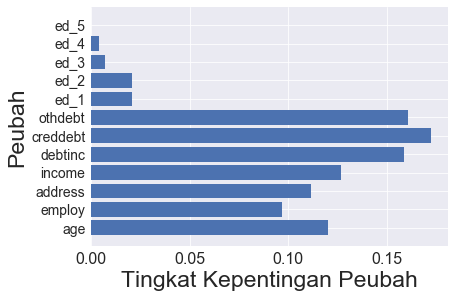

In [96]:
# plot peubah penting
plot_peubah_penting(loaded_model,FITUR_DUMMIES)